# Test reconstruction of image from MP components

## Imports and magics

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from otimage import imagerep, io, utils

## Load Zimmer data

In [3]:
# Frame index
t = 10

# Load two successive frames from dataset
img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
with io.ZimmerReader(img_path) as reader:
    units = reader.units
    img = reader.get_frame(t)

# Load MP components
mp_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mp_components/mp_0000_0050.h5'
with io.MPReader(mp_path) as reader:
    mp = reader.get_frame(t)

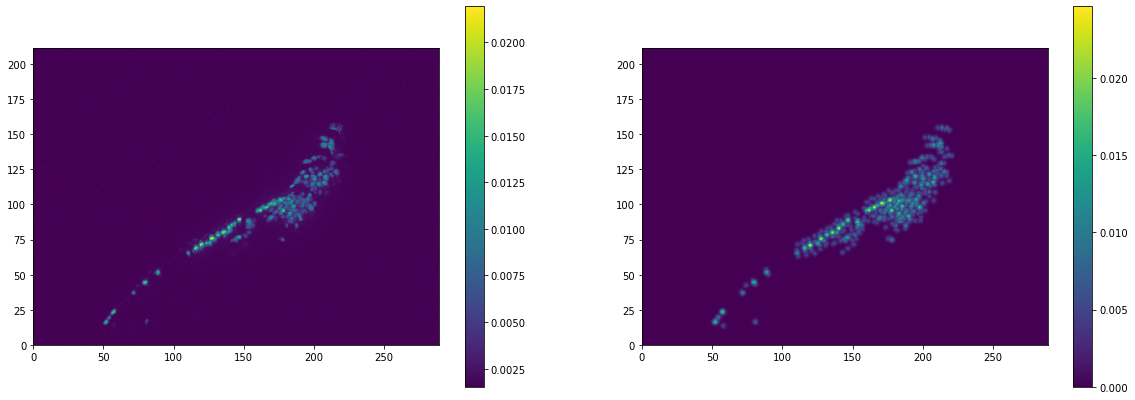

In [4]:
rec_units = np.array([1.0, 1.0, 1.0])
rec = imagerep.reconstruct_mp_image(mp, units)

#fig, (ax_1, ax_2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15, 15))

# Plot image in micron units
#im_1 = utils.plot_maxproj_units(img, units, ax=ax_1)

# Plot reconstruction
#im_2 = utils.plot_maxproj_units(rec, units, ax=ax_2);
fig = plt.figure(figsize=(20, 7))
plt.subplot(121)
utils.plot_maxproj_units(img, units)
plt.colorbar()

plt.subplot(122)
utils.plot_maxproj_units(rec, units)
plt.colorbar()